# <span style="color:blue">EVAC Workshop 3: Multi-objective evolution</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>


Before participating in this practical make sure that you have watched the the pre-workshop materials:
- Lecture 3
- Code walkthrough 5


# <span style="color:blue">Learning Objectives</span>

* Implement individuals with different representations to lists
* Implement and then examine multi-objective evolution
* Implement the Mu + Lamda algorithm manually, as needed for NGSA II

# <span style="color:blue">The problem: the kursawe function</span>

The Kursawe function has two objectives (see two equations below) that we want to minimize. It can have an arbirtarly number *N* of input variables *xi*, which take values within the range -5 and 5.

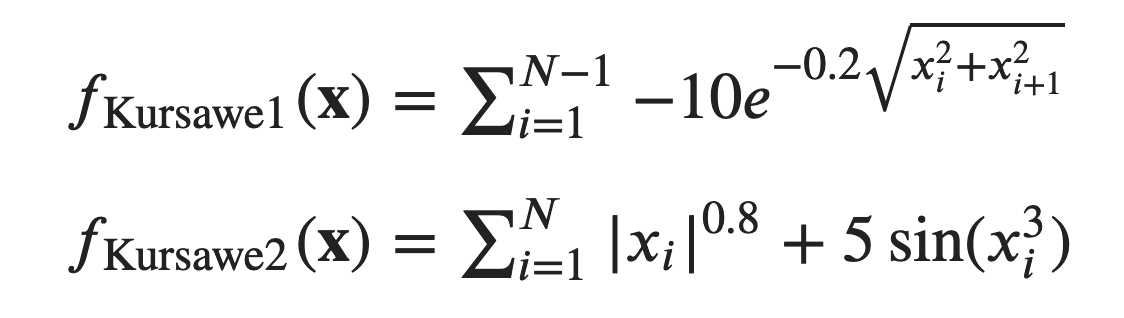

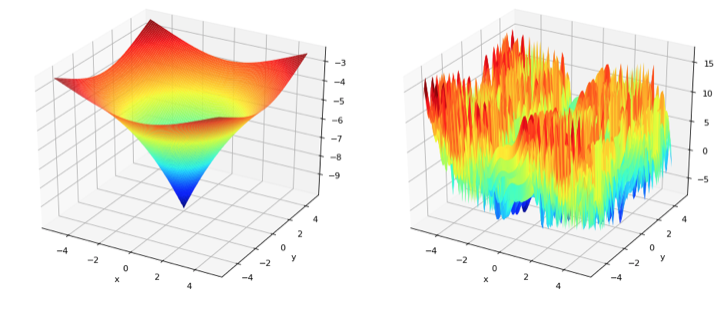

There are built-in benchmark problems in DEAP. You import them like this:

In [178]:
from deap import benchmarks

The kursawe function can be called like this:

In [179]:
exampleInputs = [-5, 2, 5]
benchmarks.kursawe(exampleInputs)

(-6.812092298638419, 13.935688996486114)

# <span style="color:blue">Task 1: Implement a multi objective GA for the kursawe function</span>

Create a GA that gives inputs that minimize the multi-objective function. For this, the number of inputs to use should be 3 to start with (which you can visualize). Then try changing it to 5.

## <span style="color:blue">GA Code Here</span>

In [180]:
NGEN = 250
CXPB = 0.5
MUTPB = 0.2
popSize = MU = 200
LAMBDA = 400
KURSAWE_INP_COUNT = 3

In [181]:
import random
from deap import base, creator, tools

creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0))  # minimising both
creator.create("Individual", list, fitness=creator.Fitness)
toolbox = base.Toolbox()
toolbox.register("attr_kursawe_bounds", random.uniform, -5.0, 5.0)
toolbox.register(
    "individual",
    tools.initRepeat,
    creator.Individual,
    toolbox.attr_kursawe_bounds,
    KURSAWE_INP_COUNT,
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.4, indpb=0.2)
toolbox.register("evaluate", benchmarks.kursawe)
toolbox.register("select", tools.selNSGA2)

In [182]:
import numpy as np

pop = toolbox.population(n=popSize)
hof = tools.ParetoFront(similar=np.allclose)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [183]:
from deap import algorithms

pop, log = algorithms.eaMuPlusLambda(
    pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof
)

gen	nevals	avg                      	std                    	min                        	max                      
0  	200   	[-9.77367932  6.4629876 ]	[2.57323736 6.29319125]	[-17.9515567   -9.42203842]	[-5.64704638 23.3748264 ]
1  	271   	[-12.0068955    1.20487962]	[2.43007824 4.403607  ]	[-19.01402458  -9.97594599]	[-6.95377661 12.3228193 ]
2  	277   	[-13.68405539  -1.46085715]	[2.34436644 4.66721192]	[-19.01402458  -9.97594599]	[-7.4270227  11.86140857]
3  	285   	[-14.70705698  -4.46626995]	[2.13278809 3.98996109]	[-19.09446028 -10.20838214]	[-9.95620822  6.26644576]
4  	283   	[-15.0240163   -6.49035151]	[1.9629034  3.02317625]	[-19.73654755 -10.95223949]	[-9.48646321  1.32640059]
5  	293   	[-15.59481472  -7.25295316]	[1.36570152 2.80337371]	[-19.73654755 -10.95223949]	[-12.69653092   0.57710324]
6  	275   	[-15.5733621   -8.25063925]	[1.06087298 2.40537992]	[-19.78472615 -11.0102015 ]	[-12.59537704   0.25419426]
7  	289   	[-15.38383287  -8.7514588 ]	[0.84553216 1.96520271]	[

## <span style="color:blue">Plot the results</span>

Text(0, 0.5, 'Fitness $Kursawe_1$')

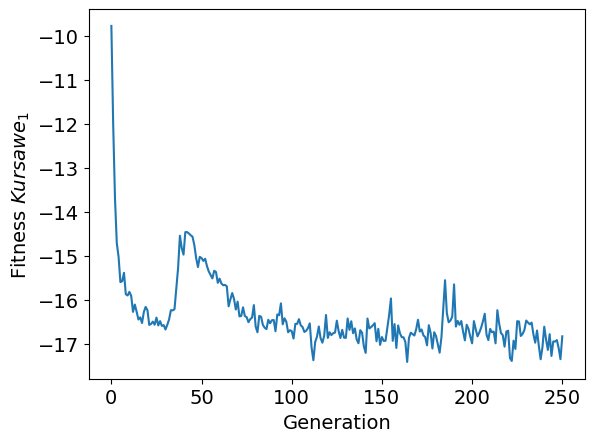

In [184]:
import matplotlib.pyplot as plt

gen = log.select("gen")
avgs = log.select("avg")
stds = log.select("std")
avgs_kurs_1 = [item[0] for item in avgs]
avgs_kurs_2 = [item[1] for item in avgs]
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, avgs_kurs_1)
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"Fitness $Kursawe_1$")

Text(0, 0.5, 'Fitness $Kursawe_2$')

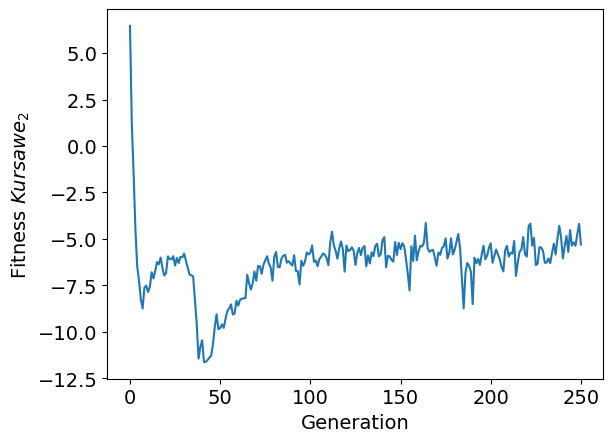

In [185]:
fig2, ax2 = plt.subplots()
line2 = ax2.plot(gen, avgs_kurs_2)
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"Fitness $Kursawe_2$")

Be sure to plot the pareto front at the end. This is possible with the 3 arguments version of this problem. You can plot using a 3D plot in Seaborn. e.g.



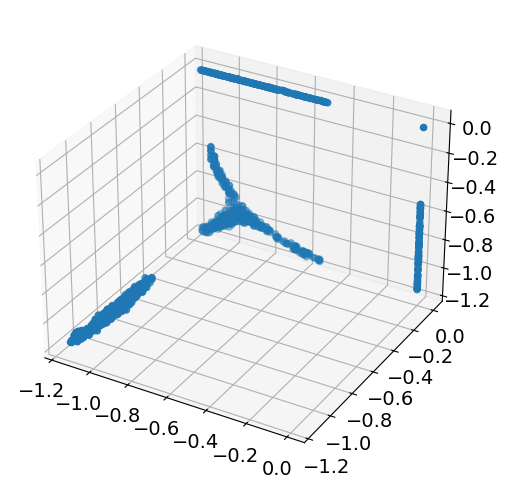

In [186]:
popnp = np.array(hof.items)
fig3d = plt.figure(figsize=(6, 6))
ax = fig3d.add_subplot(projection="3d")
ax.scatter(xs=popnp[:, 0], ys=popnp[:, 1], zs=popnp[:, 2], marker="o")

You can also plot fitness in 2D using:

```sns.kdeplot(x,y)```

<Axes: >

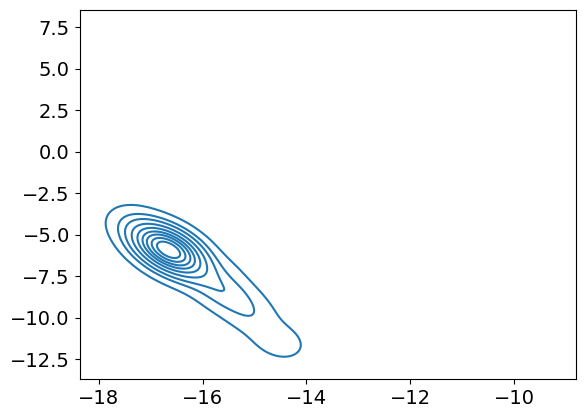

In [187]:
import seaborn as sns

sns.kdeplot(x=avgs_kurs_1, y=avgs_kurs_2)

# <span style="color:blue">Task 2: Manually Implement the Mu Plus Lambda Algorithm</span>

Based on the walkthough, you probably used the built-in Mu Plus Lambda algorithm from DEAP to implement your algorithm. Implementing an EA in this way is important for NGSA II because it ultimately selects from both the parent and a child population together. Mu plus Lamda is technically an **Evolutionary Strategy algorithm**, rather than a Genetic Algorithm, because children are produced before selection. This means you need to generate a child population first. For this, no selection is used. Instead we create a population of offspring by either replicating a parent, crossing over two parents, or replicating and then mutating a parent. These populations are then combined for selection.

You can read more about the MuPlusLamnda algorithm [here](https://deap.readthedocs.io/en/master/api/algo.html)

To produce the offspring we can use the DEAP function [algorithms.VarOR](https://deap.readthedocs.io/en/master/api/algo.html#deap.algorithms.varOr)

*(Note: The VarAnd function is also available and is a shortcut to the approach you have been manually coding before, where you perform crossover and mutation with given probabilities).*

Pseudocode for the algorithm looks like this:

evaluate(population)

for g in range(ngen):    

      offspring = varOr(population, toolbox, lambda_, cxpb, mutpb)

      evaluate(offspring)

      population = select(population + offspring, mu)

**Your task:** Implement this algorithm yourself instead of using the built-in algorithm. You will also need to update the Pareto HoF manually using hof.update(pop)

In [206]:
logbook = tools.Logbook()
pop = toolbox.population(n=popSize)

fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)
hof.clear()
for g in range(NGEN):
    offspring = algorithms.varOr(pop, toolbox, LAMBDA, CXPB, MUTPB)
    fitnesses = map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
    pop = toolbox.select(pop + offspring, MU)
    hof.update(pop)
    record = stats.compile(pop)
    logbook.record(gen=g, **record)
    print(record)

{'avg': array([-12.19439338,   0.35297317]), 'std': array([2.47410177, 4.67479112]), 'min': array([-17.91368518,  -8.92145446]), 'max': array([-6.67599999, 13.86023987])}
{'avg': array([-13.46030543,  -2.58792233]), 'std': array([2.67267546, 3.86978724]), 'min': array([-17.94752075,  -8.92145446]), 'max': array([-7.30526679,  7.95988566])}
{'avg': array([-14.44810516,  -4.78083231]), 'std': array([2.53287321, 2.59364193]), 'min': array([-19.05169161,  -9.68099614]), 'max': array([-7.90284672,  3.02402411])}
{'avg': array([-15.85256754,  -5.10599019]), 'std': array([1.9536809 , 2.81645529]), 'min': array([-19.05169161,  -9.81292748]), 'max': array([-10.59158151,   3.00492667])}
{'avg': array([-16.4540122 ,  -5.13413013]), 'std': array([1.63838936, 2.64227163]), 'min': array([-19.66899932, -11.11256713]), 'max': array([-11.01333252,   0.842609  ])}
{'avg': array([-16.75624246,  -5.18799165]), 'std': array([1.21343818, 2.48709515]), 'min': array([-19.66899932, -11.15482628]), 'max': array

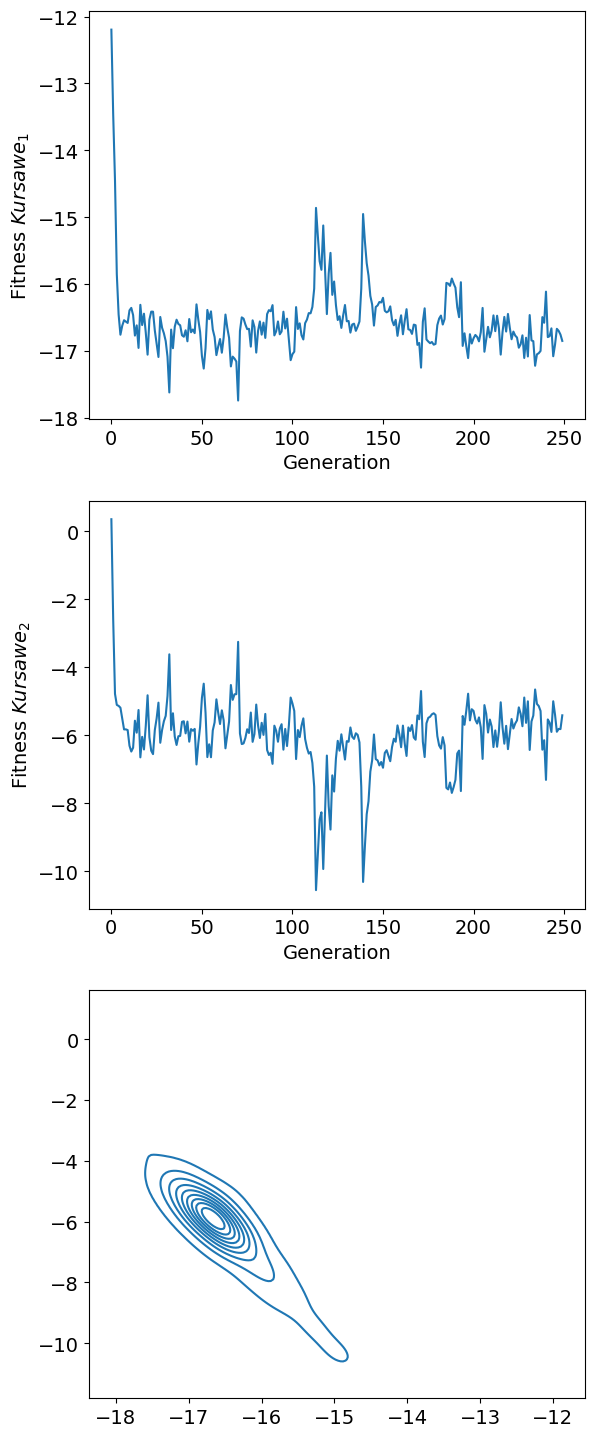

In [207]:
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
avgs_kurs_1 = [item[0] for item in avgs]
avgs_kurs_2 = [item[1] for item in avgs]
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
line1 = ax1.plot(gen, avgs_kurs_1)
line2 = ax2.plot(gen, avgs_kurs_2)
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"Fitness $Kursawe_1$")
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"Fitness $Kursawe_2$")
sns.kdeplot(ax=ax3, x=avgs_kurs_1, y=avgs_kurs_2)
plt.subplots_adjust(top=3.0)

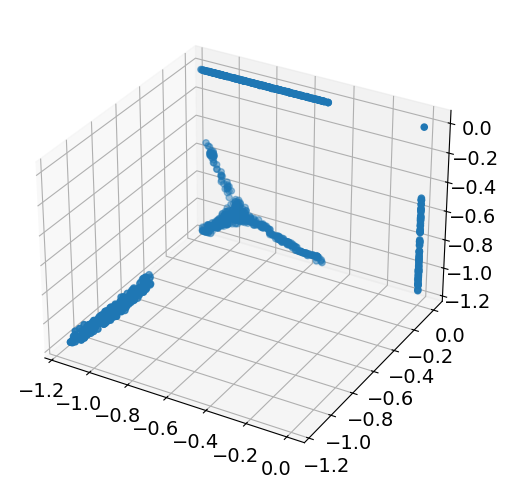

In [208]:
popnp = np.array(hof.items)
fig3d = plt.figure(figsize=(6, 6))
ax = fig3d.add_subplot(projection="3d")
ax.scatter(xs=popnp[:, 0], ys=popnp[:, 1], zs=popnp[:, 2], marker="o")

# <span style="color:blue">Optional Task 3: Implement the knapsack problem using a list or numpy array instead of set</span>

To get you more used to inheriting from different data types for individuals, **your task** is to implement the knapsack problem from the accompanying walkthrough, but represent individuals with a Python dict rather than a set.  This will also require changing the mutation and crossover functions. Allow mutation to remove items from anywhere in the bag, rather than just pop from the top.

Important: If you want to use a numpy array, you must read this first:
[numpy and deap](https://deap.readthedocs.io/en/master/tutorials/advanced/numpy.html)
And for an example see this:
[numpy and deap example](https://deap.readthedocs.io/en/master/examples/ga_onemax_numpy.html?highlight=numpy)

In [ ]:
NBR_ITEMS = 100  # The number of items to choose from
MAX_ITEM = 50  # Max items that can be in the bag
MAX_WEIGHT = 50  # Max weight of the bag
IND_INIT_SIZE = 5  # The initial number of random items in a bag for a new individual

In [ ]:
def create_dict_individual() -> dict:
    return {
        "weight": random.randrange(0, MAX_WEIGHT),
        "value": random.randrange(0, 1000),
    }


create_dict_individual()

In [ ]:
creator.create(
    "Fitness", base.Fitness, weights=(-1.0, 1.0)
)  # minimize weight, maximise value
creator.create("Individual", list, fitness=creator.Fitness)
toolbox = base.Toolbox()
toolbox.register(
    "individual",
    tools.initRepeat,
    creator.Individual,
    create_dict_individual,
    IND_INIT_SIZE,
)
toolbox.individual()